# Run scGen

add class documentation

In [ ]:
# Importing necessary libraries
import pertpy as pp
import scanpy as sc
import sys
import pandas as pd
sys.path.append('./')
from scGen_class import scGenPerturbationAnalysis

In [2]:
# Loading the dataset
covid_data = pp.dt.stephenson_2021_subsampled()
#covid_data = sc.read('data/stephenson_2021_subsampled.h5ad')

In [ ]:
# input parameters
condition_col= "time_after_LPS" #or "disease" in case COVID vs normal
ctrl_key = "nan"
stim_key = "10h" # early LPS "90m"
celltype_col = "author_cell_type" # "cell_type"
celltype_to_predict = "B_naive"
n_epochs = 20

In [4]:
# filter the data set to have pairwise comparison 
LPSN_data = covid_data[((covid_data.obs["disease"] == "normal"))]
LPSN_data = LPSN_data[(LPSN_data.obs[condition_col].isin([ctrl_key, stim_key]))]

In [5]:
#downsample the data set
sc.pp.subsample(LPSN_data, n_obs=3000)

In [ ]:
# Filter data for control and stimulated conditions
ctrl_data = LPSN_data[LPSN_data.obs[condition_col] == ctrl_key]
stim_data = LPSN_data[LPSN_data.obs[condition_col] == stim_key]

# Get unique cell types for each condition
ctrl_celltypes = set(ctrl_data.obs[celltype_col].unique())
stim_celltypes = set(stim_data.obs[celltype_col].unique())

# Find the intersection (cell types present in both conditions)
common_celltypes = list(ctrl_celltypes.intersection(stim_celltypes))

print(common_celltypes)
len(common_celltypes)

['B_naive', 'CD8.Naive', 'CD4.Naive', 'NK_16hi', 'B_immature', 'B_switched_memory', 'B_exhausted', 'NK_56hi', 'Platelets', 'CD8.EM', 'B_non-switched_memory', 'CD4.CM', 'MAIT', 'gdT', 'Plasma_cell_IgM', 'Plasmablast', 'CD8.TE', 'Plasma_cell_IgG', 'CD4.IL22']


19

In [12]:
combined_counts = LPSN_data.obs.groupby([celltype_col,condition_col]).size() 
combined_counts_df = combined_counts.reset_index(name='counts')
combined_counts_df

/var/folders/13/yntv3wyn4v90z0vh3fcqrckm0000gn/T/ipykernel_47781/2931515266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_counts = LPSN_data.obs.groupby([celltype_col,condition_col]).size()


,author_cell_type,time_after_LPS,counts
0,ASDC,10h,0
1,ASDC,nan,1
2,B_exhausted,10h,11
3,B_exhausted,nan,8
4,B_immature,10h,16
...,...,...,...
83,Treg,nan,1
84,gdT,10h,5
85,gdT,nan,89
86,pDC,10h,0


In [17]:
i


'B_exhausted'

Preprocessing data for scGen...
Data normalized for scGen.

Removed B_naive &  10h  from the training set


Setting up AnnData for scGen...
AnnData set up for scGen.

Initializing and training scGen model...


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(


scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training:   0%|          | 0/20 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.

Making predictions for  B_naive &  10h


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.

Evaluating predictions...


/Users/rosario/Documents/BioHackaton2024/scGen_class.py:303: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/merge.py:1358: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



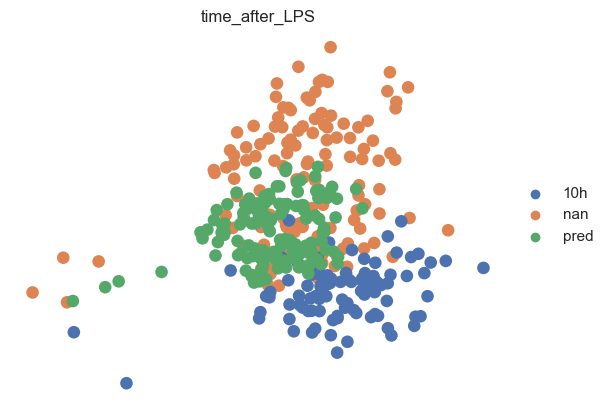

PCA plot created.



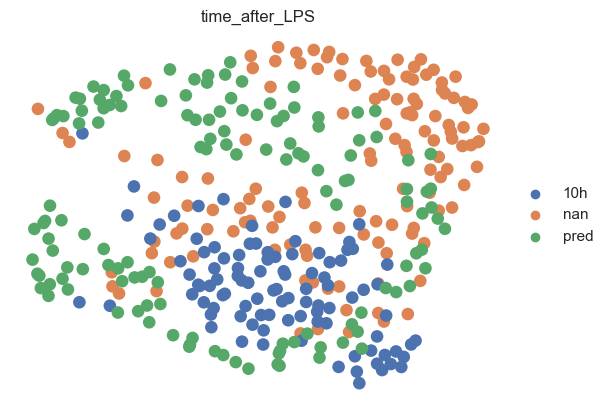

UMAP plot created.

Identifying differentially expressed genes...
Differentially expressed genes identified:
['PTPRCAP' 'ACTB' 'CD74' ... 'NFKBIA' 'DUSP1' 'RPS27']

Plotting mean gene expression correlation...


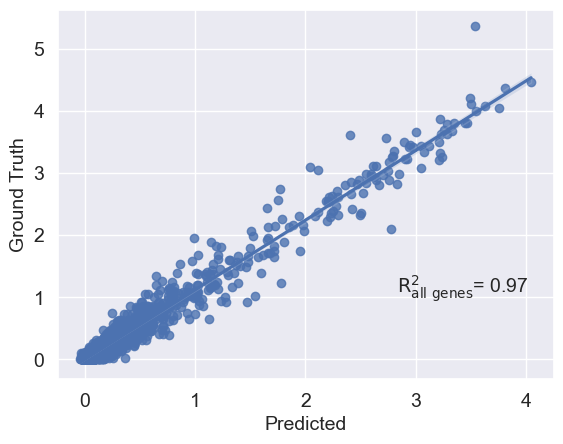

Mean expression correlation (R^2 value): 0.9659458621843133



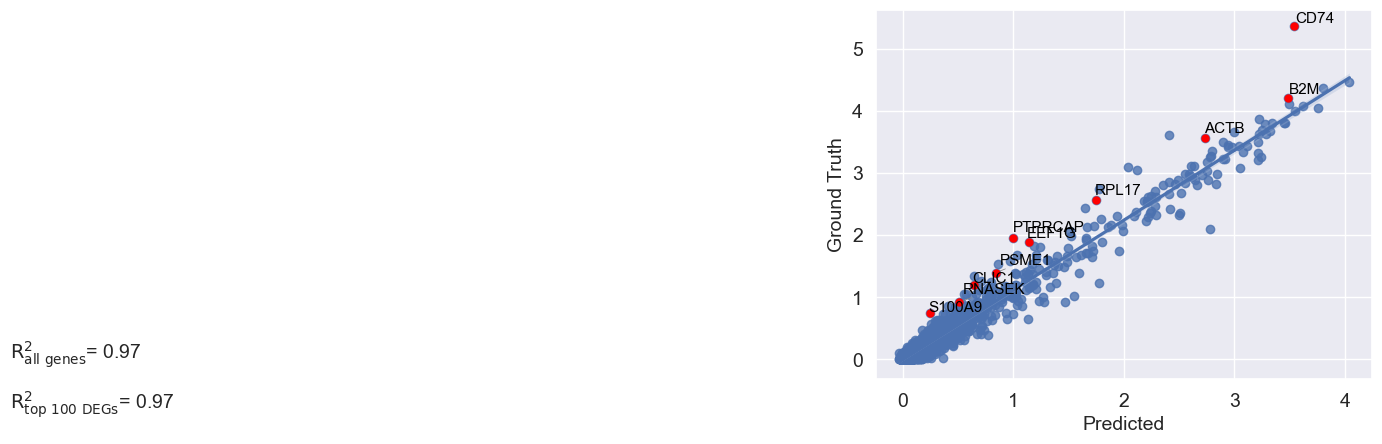

Mean expression correlation for top genes (R^2 value): 0.9659458621843133

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 2.1021653504492943

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 2.1021654297894408

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.4498846530914307

Preprocessing data for scGen...
Data normalized for scGen.

Removed CD8.Naive &  10h  from the training set


Setting up AnnData for scGen...
AnnData set up for scGen.

Initializing and training scGen model...
scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_wo

Training:   0%|          | 0/20 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.

Making predictions for  CD8.Naive &  10h


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.

Evaluating predictions...


/Users/rosario/Documents/BioHackaton2024/scGen_class.py:303: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/merge.py:1358: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



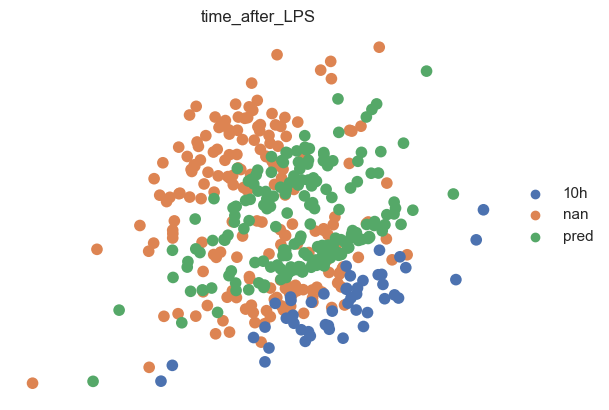

PCA plot created.



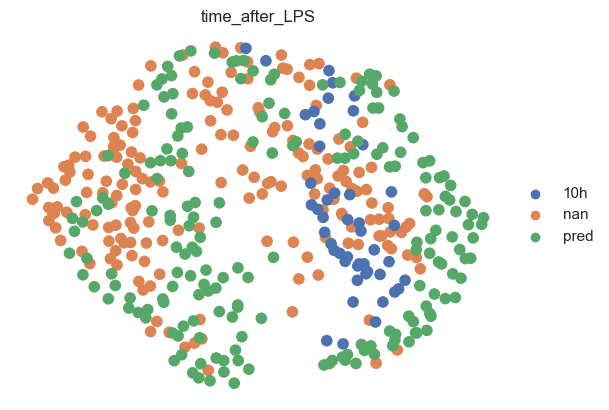

UMAP plot created.

Identifying differentially expressed genes...
Differentially expressed genes identified:
['ACTB' 'RPS4Y1' 'B2M' ... 'DUSP1' 'RPS2' 'TSC22D3']

Plotting mean gene expression correlation...


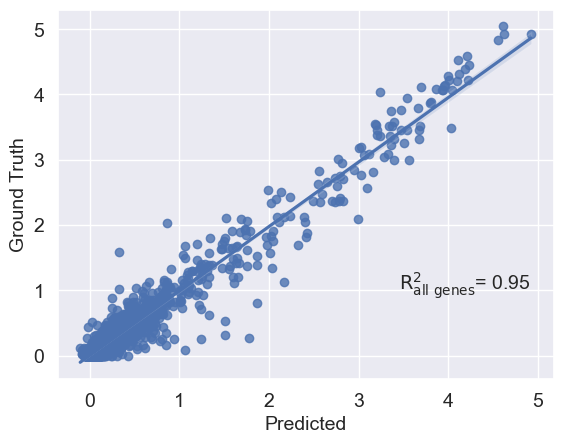

Mean expression correlation (R^2 value): 0.953197456611208



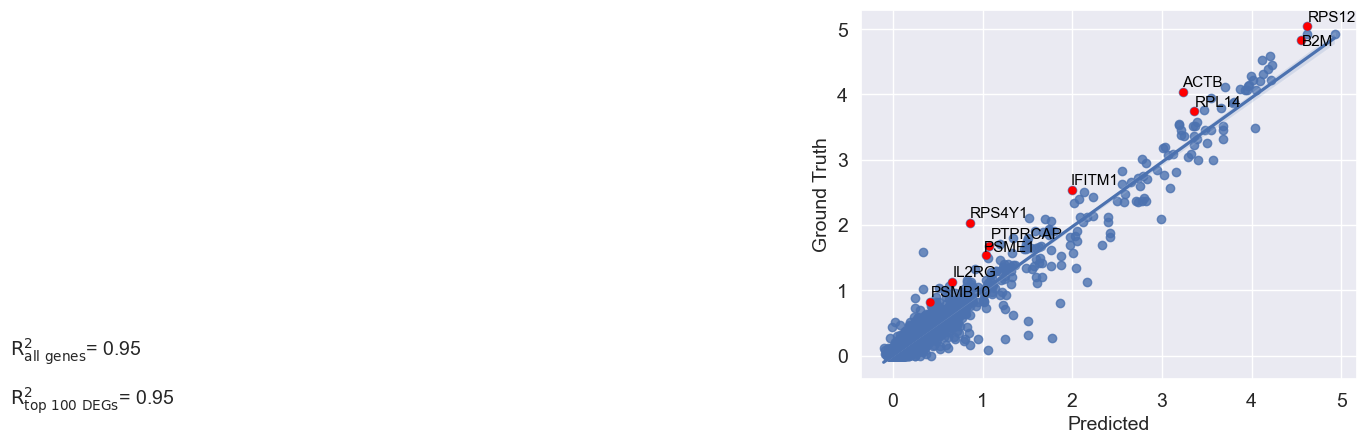

Mean expression correlation for top genes (R^2 value): 0.953197456611208

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 3.6623515500452015

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 3.6623514617015065

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.9137269258499146

Preprocessing data for scGen...
Data normalized for scGen.

Removed CD4.Naive &  10h  from the training set


Setting up AnnData for scGen...
AnnData set up for scGen.

Initializing and training scGen model...
scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_wo

Training:   0%|          | 0/20 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.

Making predictions for  CD4.Naive &  10h


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.

Evaluating predictions...


/Users/rosario/Documents/BioHackaton2024/scGen_class.py:303: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/merge.py:1358: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



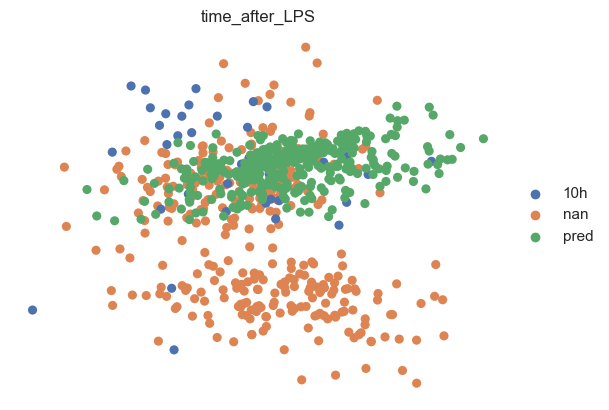

PCA plot created.



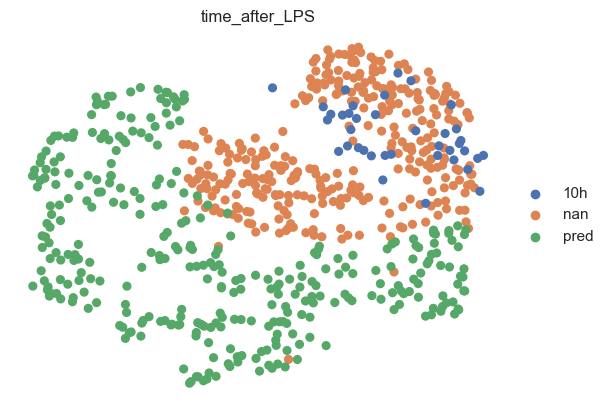

UMAP plot created.

Identifying differentially expressed genes...
Differentially expressed genes identified:
['RPS4Y1' 'B2M' 'PSME2' ... 'RPL9' 'RPS27' 'RPS2']

Plotting mean gene expression correlation...


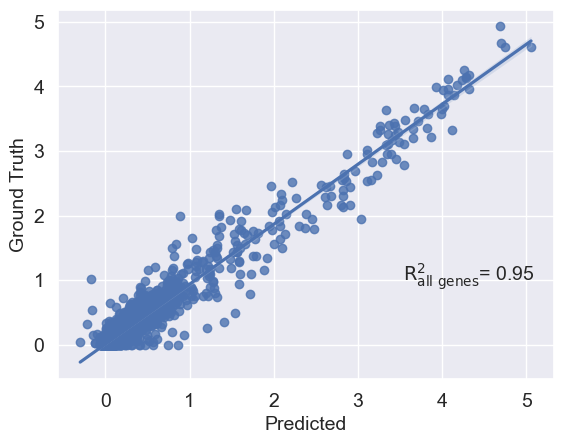

Mean expression correlation (R^2 value): 0.9461347526826457



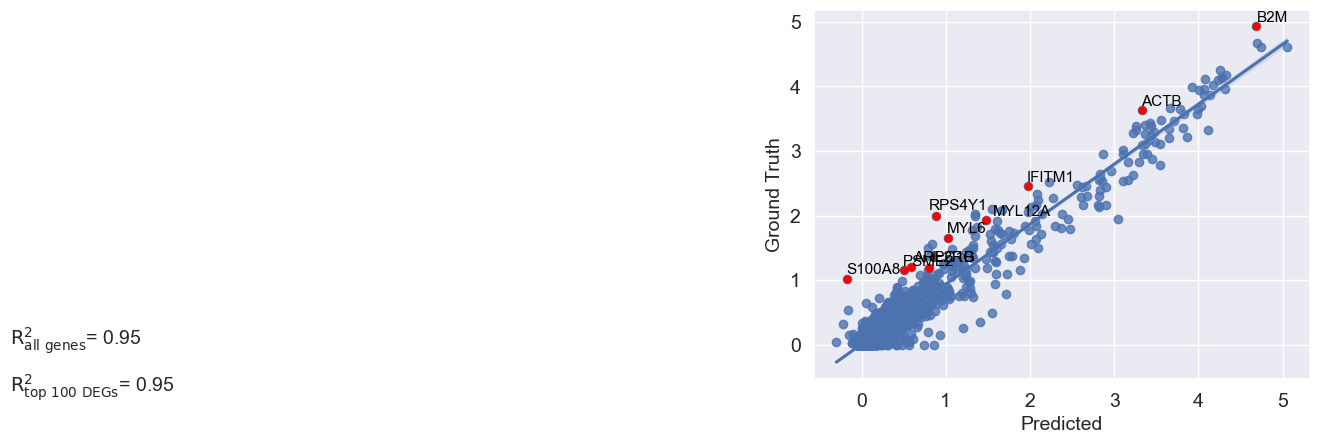

Mean expression correlation for top genes (R^2 value): 0.9461347526826457

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 3.4901475224192797

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 3.4901478160466324

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.8681933879852295

Preprocessing data for scGen...
Data normalized for scGen.

Removed NK_16hi &  10h  from the training set


Setting up AnnData for scGen...
AnnData set up for scGen.

Initializing and training scGen model...
scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_wo

Training:   0%|          | 0/20 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.

Making predictions for  NK_16hi &  10h


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.

Evaluating predictions...


/Users/rosario/Documents/BioHackaton2024/scGen_class.py:303: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/merge.py:1358: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



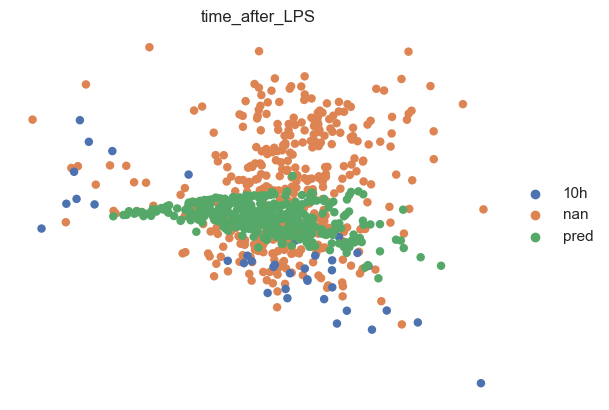

PCA plot created.



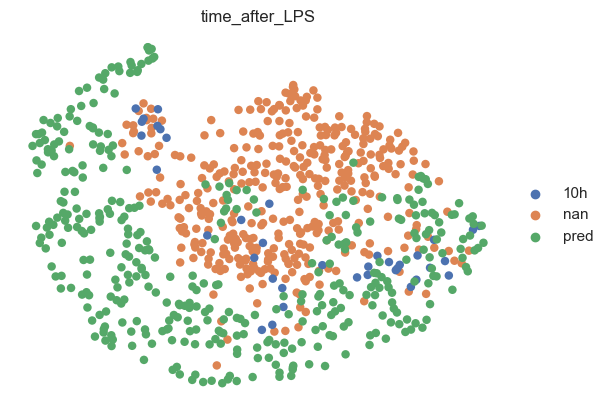

UMAP plot created.

Identifying differentially expressed genes...
Differentially expressed genes identified:
['CD3E' 'GIMAP7' 'IL2RG' ... 'RPL21' 'CD7' 'RPL41']

Plotting mean gene expression correlation...


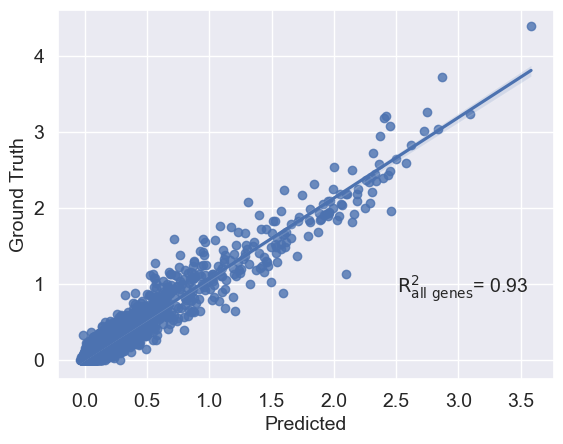

Mean expression correlation (R^2 value): 0.9316313784499552



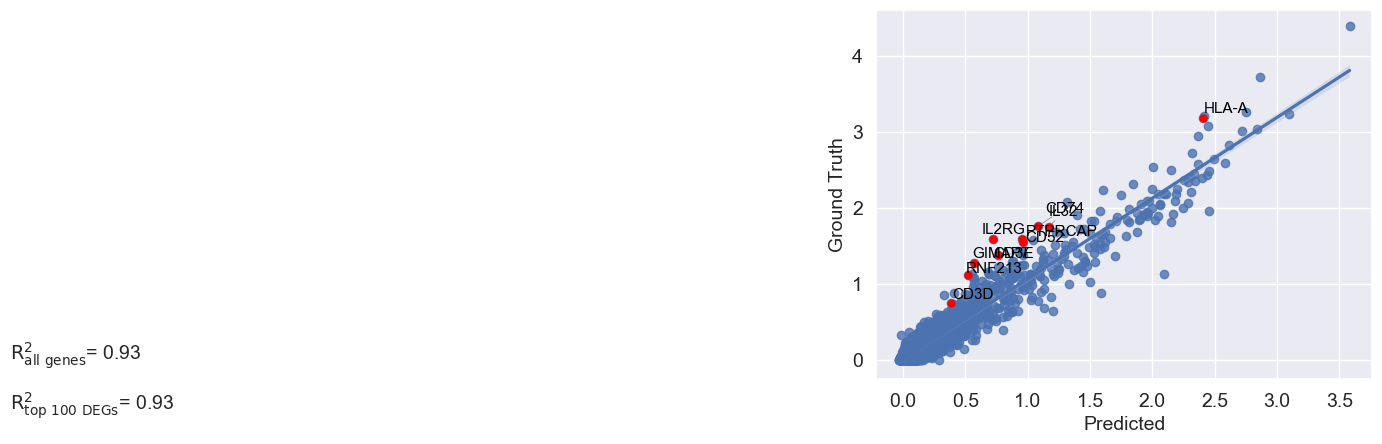

Mean expression correlation for top genes (R^2 value): 0.9316313784499552

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 3.391086002303734

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 3.3910860445489

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.8414902687072754

Preprocessing data for scGen...
Data normalized for scGen.

Removed B_immature &  10h  from the training set


Setting up AnnData for scGen...
AnnData set up for scGen.

Initializing and training scGen model...
scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_wo

Training:   0%|          | 0/20 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.

Making predictions for  B_immature &  10h


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.

Evaluating predictions...


/Users/rosario/Documents/BioHackaton2024/scGen_class.py:303: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/merge.py:1358: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



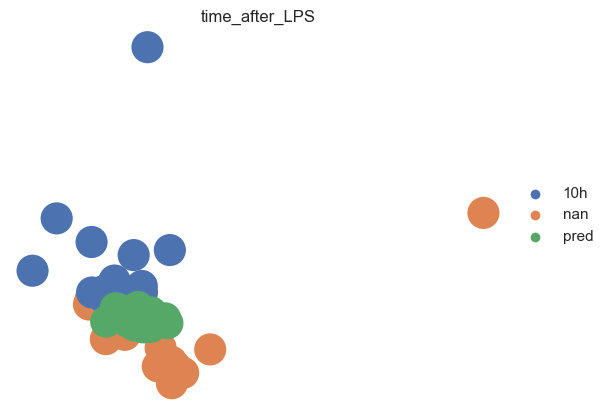

PCA plot created.



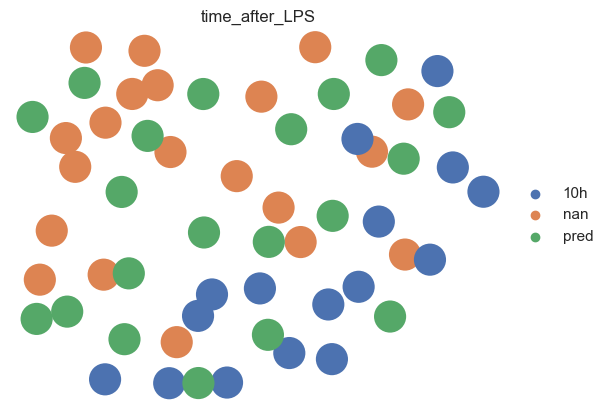

UMAP plot created.

Identifying differentially expressed genes...
Differentially expressed genes identified:
['RPL12' 'RCSD1' 'TRAPPC1' ... 'RPS29' 'RPL37' 'RPS27']

Plotting mean gene expression correlation...


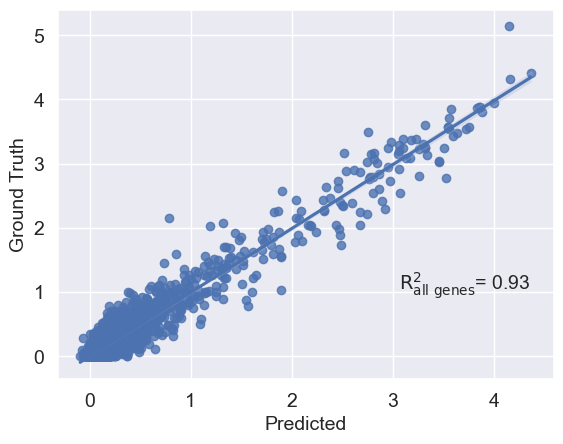

Mean expression correlation (R^2 value): 0.9286769539266458



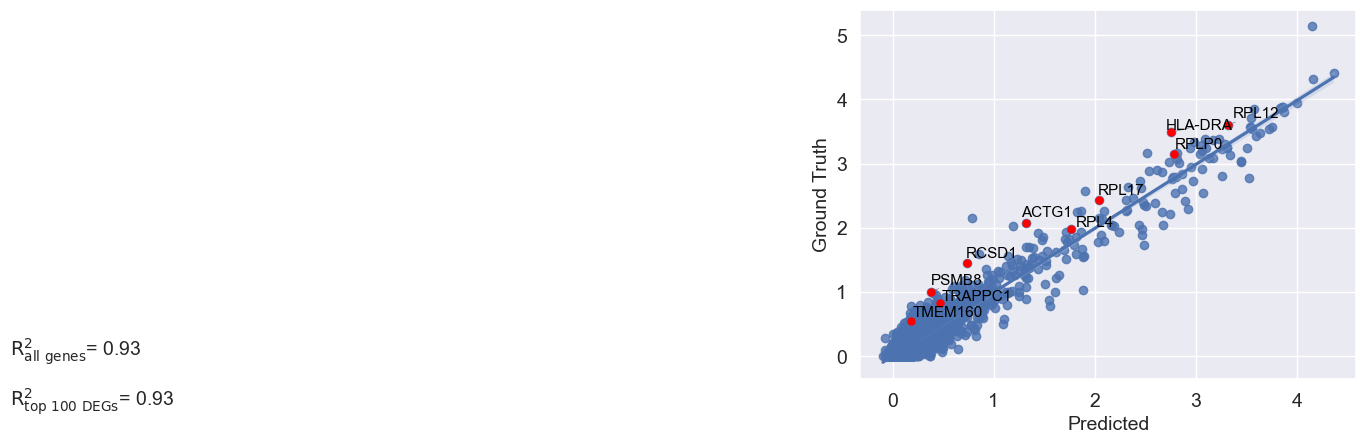

Mean expression correlation for top genes (R^2 value): 0.9286769539266458

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.641837284494037

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.6418372973072233

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.2813421487808228

Preprocessing data for scGen...
Data normalized for scGen.

Removed B_switched_memory &  10h  from the training set


Setting up AnnData for scGen...
AnnData set up for scGen.

Initializing and training scGen model...
scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_wo

Training:   0%|          | 0/20 [00:00<?, ?it/s]

2024-11-06 20:33:44.771389: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 29m59.579486s

********************************
[Compiling module jit_jit_training_step] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.

Making predictions for  B_switched_memory &  10h


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.

Evaluating predictions...


/Users/rosario/Documents/BioHackaton2024/scGen_class.py:303: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/merge.py:1358: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



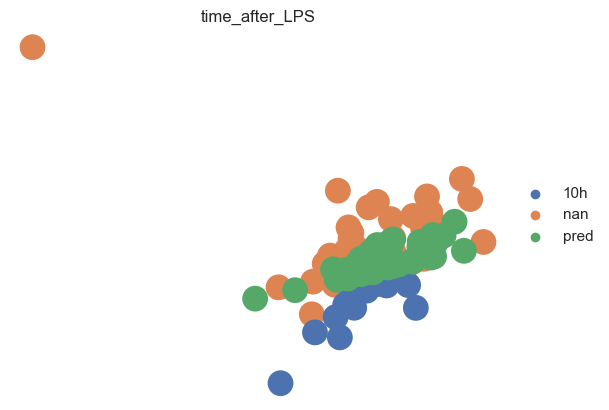

PCA plot created.



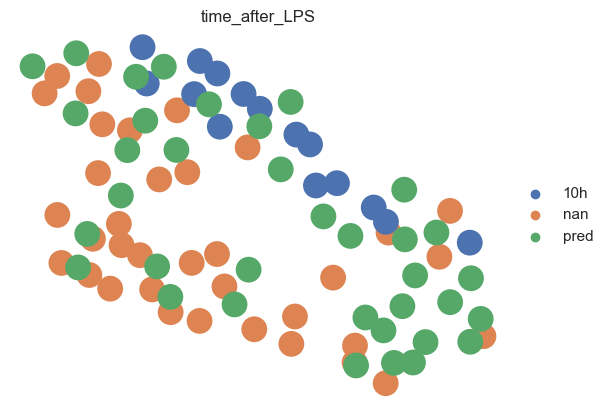

UMAP plot created.

Identifying differentially expressed genes...
Differentially expressed genes identified:
['PTPRCAP' 'S100A8' 'RPL17' ... 'ZFP36L2' 'RPS27' 'KLF6']

Plotting mean gene expression correlation...


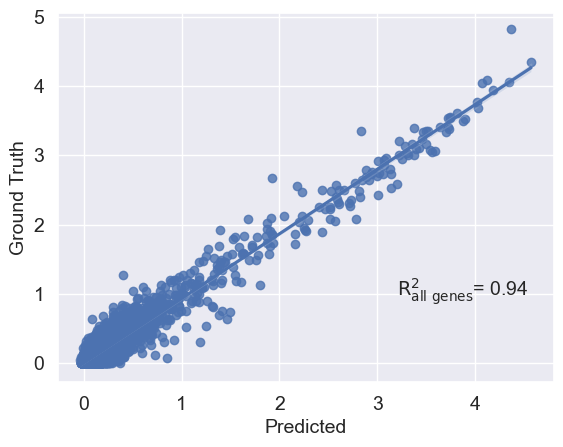

Mean expression correlation (R^2 value): 0.939438263730539



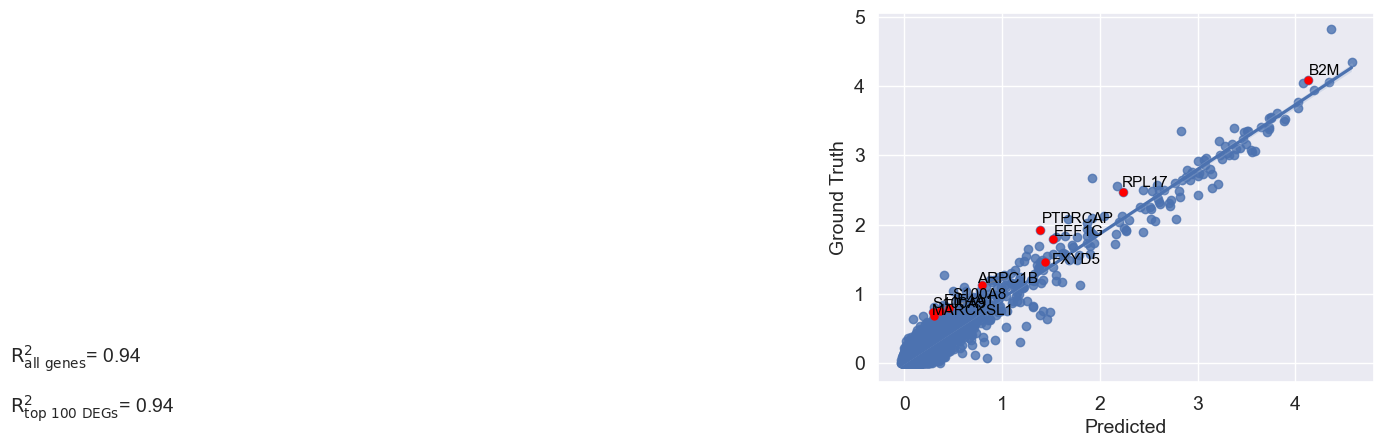

Mean expression correlation for top genes (R^2 value): 0.939438263730539

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.9729596808023364

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.9729596602151906

Computing distance metric...
PCA with 50 components computed.

Distance metric initialized.

Perturbation score computed: 1.4046207666397095

Preprocessing data for scGen...
Data normalized for scGen.

Removed B_exhausted &  10h  from the training set


Setting up AnnData for scGen...
AnnData set up for scGen.

Initializing and training scGen model...
scGen model initialized.

INFO     Jax module moved to TFRT_CPU_0.Note: Pytorch lightning will show GPU is not being used for the Trainer.   


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:186: UserWarning: Category 0 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_wo

Training:   0%|          | 0/20 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


scGen model trained.

scGen model saved to 'model_perturbation_prediction.pt'.

Making predictions for  B_exhausted &  10h


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
Predictions made.

Evaluating predictions...


/Users/rosario/Documents/BioHackaton2024/scGen_class.py:303: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  self.eval_adata = ctrl_adata.concatenate(stim_adata, self.pred)
/Users/rosario/opt/anaconda3/envs/pertpy-env/lib/python3.10/site-packages/anndata/_core/merge.py:1358: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


Evaluation data prepared.



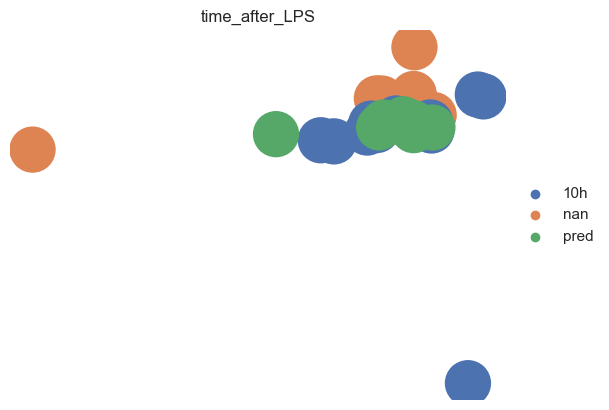

PCA plot created.



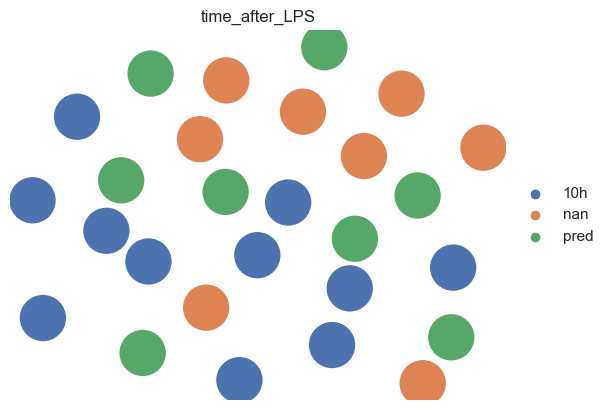

UMAP plot created.

Identifying differentially expressed genes...
Differentially expressed genes identified:
['HINT1' 'APBB1IP' 'LBH' ... 'RPS27' 'CCNH' 'RPL37']

Plotting mean gene expression correlation...


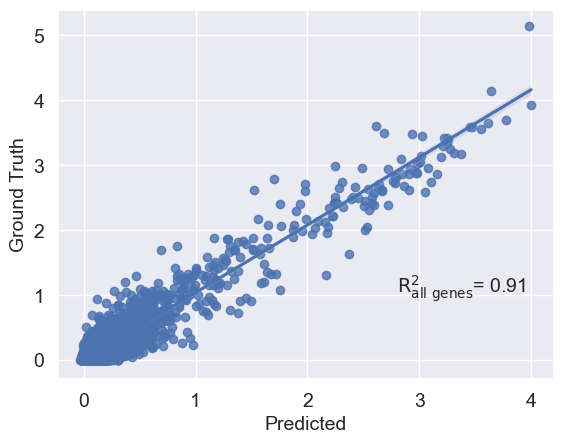

Mean expression correlation (R^2 value): 0.906285022959805



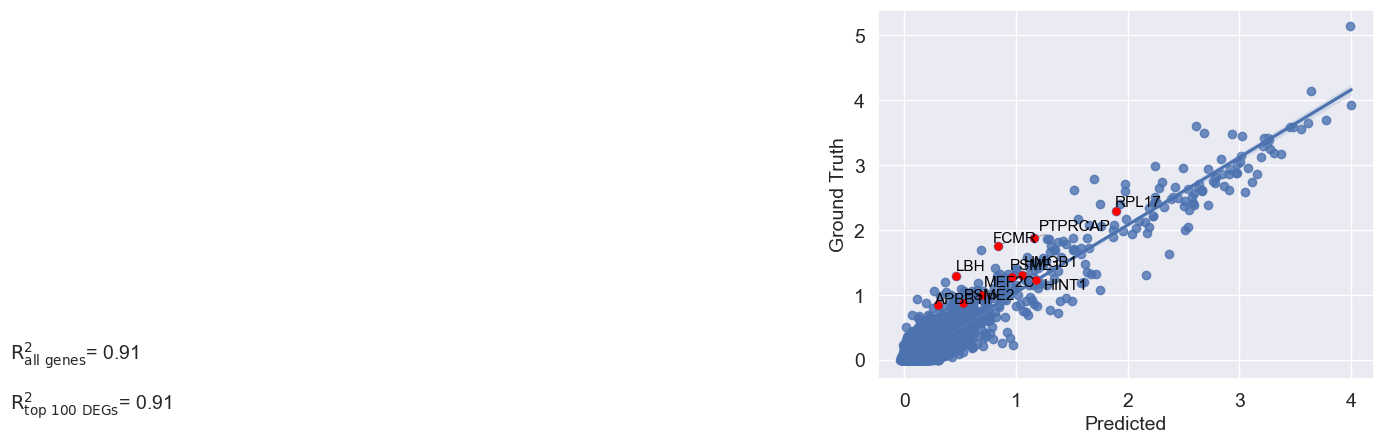

Mean expression correlation for top genes (R^2 value): 0.906285022959805

Computing distance metric...


ValueError: `k` must be an integer satisfying `0 < k < min(A.shape)`.

In [ ]:
# Initialize an empty list to store the results
results = []

for i in common_celltypes:

    celltype_to_predict = i

    # Instantiating the PerturbationAnalysis class with the loaded data
    analysis = scGenPerturbationAnalysis(LPSN_data)
    # Preprocessing the data
    analysis.preprocess_data() #just normalisation, not log1p
    analysis.prepare_training_set(condition_col, 
                                stim_key,
                                celltype_col,
                                celltype_to_predict)
    # Setting up AnnData for scGen
    analysis.setup_anndata(condition_col, 
                        celltype_col)
    analysis.train_model(max_epochs= n_epochs, batch_size=64)
    # Making predictions 
    analysis.make_prediction(
                            ctrl_key,
                            stim_key,
                            celltype_to_predict,
                            condition_col)
    # Evaluating the predictions
    analysis.evaluate_prediction(celltype_col,
                                celltype_to_predict,
                                condition_col,
                                ctrl_key,
                                stim_key)
    # Identifying differentially expressed genes
    analysis.identify_diff_genes(celltype_col,
                                celltype_to_predict,
                                condition_col,
                                stim_key)
    analysis.plot_mean_correlation(stim_key)
    
    # Get R2 value
    r2_value = analysis.r2_value

    # Computing the distance metric
    metric = "edistance"
    n_comps = 50
    analysis.compute_distance_metric(n_comps,
                                    metric,
                                    condition_col,
                                    stim_key,
                                    ctrl_key)
    # Get the perturbation score
    e_distance = analysis.perturbation_score

    metric = "mmd"
    n_comps = 50
    analysis.compute_distance_metric(n_comps,
                                    metric,
                                    condition_col,
                                    stim_key,
                                    ctrl_key)
    # Get the perturbation score
    mmd = analysis.perturbation_score #maximum mean distance

    metric = "euclidean"
    n_comps = 50
    analysis.compute_distance_metric(n_comps,
                                    metric,
                                    condition_col,
                                    stim_key,
                                    ctrl_key)
    # Get the perturbation score
    euclidean = analysis.perturbation_score #maximum mean distance

    results.append({
            "celltype_to_predict": celltype_to_predict,
            "r2_value": r2_value,
            "e_distance": e_distance,
            "mmd": mmd,
            "euclidean": euclidean


        })
    
    
results_df = pd.DataFrame(results)
results_df.to_csv("results_table_stephenson_20epochs_lateLPS.csv", index=False)



In [30]:
results_df = pd.DataFrame(results)
results_df.to_csv("results_table_stephenson_20epochs_lateLPS.csv", index=False)

NameError: name 'pd' is not defined